# [HW4] FBA QUANT - FINANCIAL ENGINEERING

Kim Na Young (dudskrla09@gmail.com)

---

### Problem 1. 


Derive the below forward equations.

$$ P^{e}_{k+1, s} = \frac{P^{e}_{k, s-1}}{2(1+r_{k,s-1})} + \frac{P^{e}_{k, s}}{s(1+r_{k,s})}, \; 0<s<k+1 $$
$$ P^{e}_{k+1, 0} = \frac{P^{e}_{k,0}}{2(1+r_{k,0})} $$ 
$$ P^{e}_{k+1, k+1} = \frac{P^{e}_{k,k}}{2(1+r_{k,k})} $$ 
$$ with \quad P^{e}_{0, 0} $$

### Solution 1.

---

### Problem 2. 

Use the forward equations to compute the state prices for t = 0, ⋯ ,6 in the short-rate lattice below. Now answer the following questions:


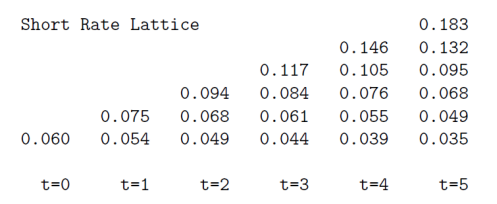

(a) Compute the price of a 4-period zero-coupon bond with face value 100 that expires at t = 4.        
(b) Compute the price of a European call option on the zero-coupon bond of (a) that expires at t=2 and has strike $84.    
(c) Compute the price of a forward contract for delivery at t = 4 of a 2-year 10% coupon bearing bond where we assume that delivery takes place just after a coupon has been paid.              
(d) Compute the price of a caplet that expires at t = 6 with strike = 2%.             

### Solution 2.

In [ ]:
import numpy as np
import pandas as pd

t = 5

In [ ]:
# Initialize Short rate 
df_short_rate = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))

# Initialize iloc[-1] 
df_short_rate.loc[t, 0] = 0.06
for col in range(1, t+1):
    df_short_rate.loc[t, col] = df_short_rate.loc[t, col-1] * 0.9 # down 

for index in range(1, t+1):
    row = t - index
    for col in range(index, t+1):
        df_short_rate.loc[row, col]  = df_short_rate.loc[row+1, col-1] * 1.25  # up 

print("Short Rate: ")
df_short_rate

Short Rate: 


,0,1,2,3,4,5
0,0.00,0.000,0.00000,0.000000,0.000000,0.183105
1,0.00,0.000,0.00000,0.000000,0.146484,0.131836
2,0.00,0.000,0.00000,0.117188,0.105469,0.094922
3,0.00,0.000,0.09375,0.084375,0.075937,0.068344
4,0.00,0.075,0.06750,0.060750,0.054675,0.049208
5,0.06,0.054,0.04860,0.043740,0.039366,0.035429


In [ ]:
########### backward
# (a) Compute the price of a 4-period zero-coupon bond with face value 100 that expires at t = 4.   

# Initialize Bond price
df_bond_price = pd.DataFrame(np.zeros((t+1)*(t+1)).reshape(t+1,t+1))

# Initialize t=4 as 100 (Face value) 
df_bond_price[t-1] = 100

for index in range(1, t):
    col = (t-1) - index
    for row in range(index+1, t+1):
        short_rate = df_short_rate.loc[row, col]
        upper_node = df_bond_price.loc[row-1, col+1]
        lower_node = df_bond_price.loc[row, col+1]
        df_bond_price.loc[row, col]  = ( (1/2) * upper_node + (1/2) * lower_node) / (1 + short_rate)

print("The price of a 4-period zero-coupon bond: ")
df_bond_price.loc[1:, :4]

The price of a 4-period zero-coupon bond: 


,0,1,2,3,4
1,0.00000,0.000000,0.000000,0.000000,100
2,0.00000,0.000000,0.000000,89.510490,100
3,0.00000,0.000000,83.076347,92.219020,100
4,0.00000,79.268001,87.349855,94.272920,100
5,77.21774,84.433608,90.636192,95.809301,100


In [ ]:
# (b) Compute the price of a European call option on the zero-coupon bond of (a) that expires at t=2 and has strike $84.  

expiration_year = 2 
strike_price = 84

df_european_call_option = df_bond_price.loc[t-expiration_year:, :t-expiration_year-1]

# Pay off 
for row in range(0, 3):
    df_european_call_option.iloc[row, 2] = max(0, df_european_call_option.iloc[row, 2] - strike_price)

# 
for index in range(1, expiration_year+1):
    col = expiration_year - index
    for row in range(index, expiration_year+1):
        short_rate = df_short_rate.iloc[row+3, col]
        upper_node = df_european_call_option.iloc[row-1, col+1]
        lower_node = df_european_call_option.iloc[row, col+1]
        df_european_call_option.iloc[row, col]  = ( (1/2) * upper_node + (1/2) * lower_node) / (1 + short_rate)

print("The price of a European call option: ")
df_european_call_option

The price of a European call option: 


,0,1,2
3,0.000000,0.000000,0.000000
4,0.000000,1.558072,3.349855
5,2.969474,4.737214,6.636192


In [ ]:
# (c) Compute the price of a forward contract for delivery at t = 4 of a 2-year 10% coupon bearing bond 
# where we assume that delivery takes place just after a coupon has been paid.

face_value = 100
coupon = 10

# Initialize Bond price
df_forward_contract = pd.DataFrame(np.zeros((t+2)*(t+2)).reshape(t+2,t+2))

# Initialize t=6 as 110 (Face value 100 + coupon 10)
df_forward_contract[t+1] = face_value + coupon

# Initialize t=5 (Discount Face value + coupon 10)
for row in range(0, t+1):
    short_rate = df_short_rate.loc[row, 5]
    upper_node = df_forward_contract.loc[row, 6]
    lower_node = df_forward_contract.loc[row+1, 6]
    df_forward_contract.loc[row+1, 5]  = coupon + ( (1/2) * upper_node + (1/2) * lower_node) / (1 + short_rate)

# Backward (t=4 ~ t=0)
for index in range(1, t+2):
    col = t - index
    for row in range(index+1, t+2):
        short_rate = df_short_rate.loc[row-1, col]
        upper_node = df_forward_contract.loc[row-1, col+1]
        lower_node = df_forward_contract.loc[row, col+1]
        df_forward_contract.loc[row, col]  = ( (1/2) * upper_node + (1/2) * lower_node) / (1 + short_rate)

# G_0 = (E[Z_4/B_4]) / (E[1/B_4]) 
# numerator : time t=0 price of bond 
# denominator : time t=0 price of ZCB maturing at t=4 
numerator = df_forward_contract.iloc[-1, 0]
denominator = df_bond_price.iloc[-1, 0] / 100 # Assumption) face value : $1 | df_bond_price's Assumption) face value : $100 
G_0 = numerator / denominator

print(f"The price of a forward contract: {G_0}")
print(f"Forward Contract: ")
df_forward_contract

The price of a forward contract: 103.3790454456683
Forward Contract: 


,0,1,2,3,4,5,6
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110
1,0.000000,0.000000,0.000000,0.000000,0.000000,102.975650,110
2,0.000000,0.000000,0.000000,0.000000,91.655362,107.187230,110
3,0.000000,0.000000,0.000000,85.078926,98.442864,110.463789,110
4,0.000000,0.000000,81.529355,93.266538,103.828941,112.963115,110
5,0.000000,79.991093,90.451494,99.847402,107.997321,114.841035,110
6,79.826963,89.242069,97.670786,104.987771,111.162551,116.236118,110


In [ ]:
# (d) Compute the price of a caplet that expires at t = 6 with strike = 2%. 

strike_ratio = 0.02 # 2%

df_caplet = df_short_rate.copy()

# Initialize t=5
for row in range(0, t+1):
    short_rate = df_short_rate.iloc[row, 5]
    df_caplet.iloc[row, 5] = max(0, short_rate - strike_ratio) / (1 + short_rate)

for index in range(1, t+1):
    col = t - index
    for row in range(index, t+1):
        short_rate = df_short_rate.loc[row, col]
        upper_node = df_caplet.loc[row-1, col+1]
        lower_node = df_caplet.loc[row, col+1]
        df_caplet.loc[row, col]  = ( (1/2) * upper_node + (1/2) * lower_node) / (1 + short_rate)

caplet_price = df_caplet.iloc[-1, 0]

print(f"The price of a caplet: {caplet_price}")
print(f"Caplet: ")
df_caplet

The price of a caplet: 0.042045224917924694
Caplet: 


,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.137862
1,0.000000,0.000000,0.000000,0.000000,0.103216,0.098809
2,0.000000,0.000000,0.000000,0.080048,0.075640,0.068427
3,0.000000,0.000000,0.063672,0.059236,0.052827,0.045251
4,0.000000,0.051503,0.047058,0.041234,0.034650,0.027838
5,0.042045,0.037633,0.032272,0.026448,0.020560,0.014901


---

### Problem 3.

You are given an incomplete specification of the term structure, as specified by the spot rates and forward rates noted next. You also know that the price of a 6-year bond with coupon rate 10% is $145.749 and the price of a 6-year bond with coupon rate 5% is $100.315. 
For all bonds, the face value is $100, and the coupons are paid annually. Assuming continuous compounding, find the missing rates.

𝑠1 =? , 𝑠2 = 6.9%, 𝑠3 = 7.5%, 𝑠4 =? , 𝑠5 = 8.4%, 𝑠6 =?
𝑓1,2 = 7.8%, 𝑓2,3 = 8.7%, 𝑓5,6 =? , 𝑓1,3 = 8.25%, 𝑓2,4 = 11.55%


### Solution 3.

In [ ]:
face_value = 100

coupon_rate_1 = 0.10 
present_value_1 = 145.749 

coupon_rate_2 = 0.05
present_value_2 = 100.315


spot_rate = {
    "2": 0.069,
    "3": 0.075,
    "5": 0.084,
} 

f_1_2 = 0.078
f_2_3 = 0.087
f_1_3 = 0.825
f_2_4 = 0.1155


def calculate_forward_rate(i, j):
    forward_rate = ((1+spot_rate[str(j)])**j / (1+spot_rate[str(i)])**i) ** (1/(j-i)) - 1
    return forward_rate

def find_numerate_spot_rate(forward_rate, i, j):
    s_i = spot_rate[str(i)]
    s_j = ((forward_rate + 1)**(j-i) * (s_i + 1)**i)**(1/j) - 1
    return s_j

def find_denominator_spot_rate(forward_rate, i, j):
    s_j = spot_rate[str(j)]
    s_i = ((s_j + 1)**j / (forward_rate + 1)**(j-i))**(1/i) - 1
    return s_i

# 1) Find s_1
s_1 = find_denominator_spot_rate(f_1_2, 1, 2)
spot_rate["1"] = s_1

# 2) Find s_4
s_4 = find_numerate_spot_rate(f_2_4, 2, 4)
spot_rate["4"] = s_4

# 3) Find s_6
# no-arbitrage 
F = - face_value * coupon_rate_1 + face_value * coupon_rate_2
P = - present_value_2 * coupon_rate_1 + present_value_1 * coupon_rate_2 
s_6 = (F / P) ** (1/6) - 1
spot_rate["6"] = s_6

#Assumption) no-arbitrage 
# Bond A 
# coupon_rate_1 : 10%
# present_value_1 : 145.749 
# maturity : 6th year

# Bond B
# coupon_rate_2 : 5%
# present_value_2 : 100.315 
# maturity : 6th year

# if Bond A * 5% (coupon_rate_2)
# if Bond B * 10% (coupon_rate_1)
# coupon_1 == coupon_2 (because, no-arbitrage)

# Let, Bond C =  Bond A * 5% - Bond B * 10%


# 4) Find f_5_6
f_5_6 = calculate_forward_rate(5, 6)

print(f"s1 : {s_1} \ns4: {s_4} \ns6: {s_6} \nf_5_6 : {f_5_6}")

s1 : 0.06007513914656748 
s4: 0.09200251831211448 
s6: 0.10517146719139836 
f_5_6 : 0.21739516571075113
